# Week 2 Basic Charting

## Matplotlib Architecture

In [1]:
%matplotlib notebook
import matplotlib as mpl
mpl.get_backend()

'nbAgg'

In [2]:
import matplotlib.pyplot as plt

In [10]:
plt.plot(3, 2)

<IPython.core.display.Javascript object>

In [11]:
plt.plot(3, 2, '.')

In [12]:
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure

In [13]:
fig=Figure()
canvas=FigureCanvasAgg(fig)
ax=fig.add_subplot(111)
ax.plot(3,2,".")
canvas.print_png("test.png")

In [14]:
%%html
<img src="test.png" />
#to see the image in the browser

In [15]:
plt.figure()
plt.plot(3,2,"o")
ax=plt.gca() #gca=get access to current axes
ax.axis([0,6,0,10]) #Xmin=0 , Xmax=6, Ymnin=0, Ymax=10

<IPython.core.display.Javascript object>

[0, 6, 0, 10]

In [16]:
#create new figure
plt.figure()
plt.plot(1.5,1.5,"o")
plt.plot(2,2,"o")
plt.plot(3,3,"o")

<IPython.core.display.Javascript object>

In [17]:
# get all the child objects that that axis contains
ax=plt.gca()
ax.get_children()

 Text(0.5,1,''),
 Text(0,1,''),
 Text(1,1,''),

## Scatterplot

<IPython.core.display.Javascript object>


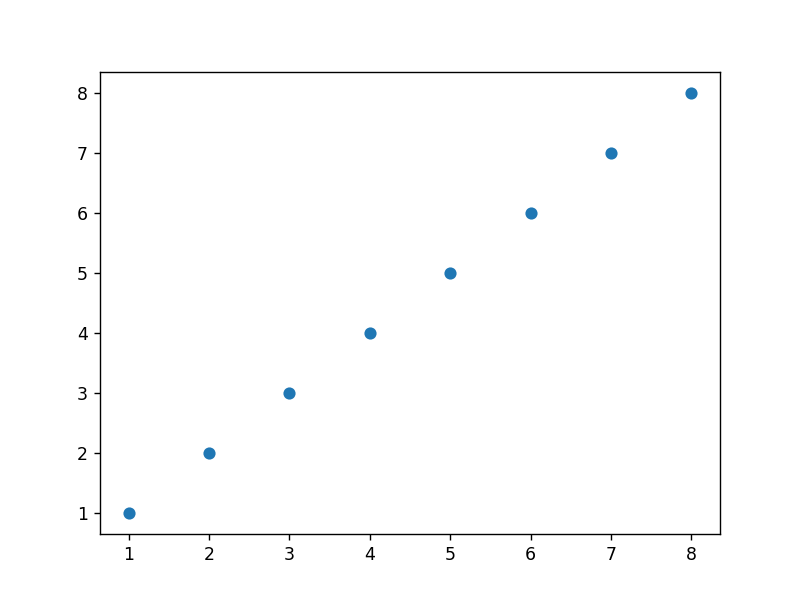

In [3]:
import numpy as np

x=np.array([1,2,3,4,5,6,7,8])
y=x
plt.figure()
plt.scatter(x,y)

<IPython.core.display.Javascript object>


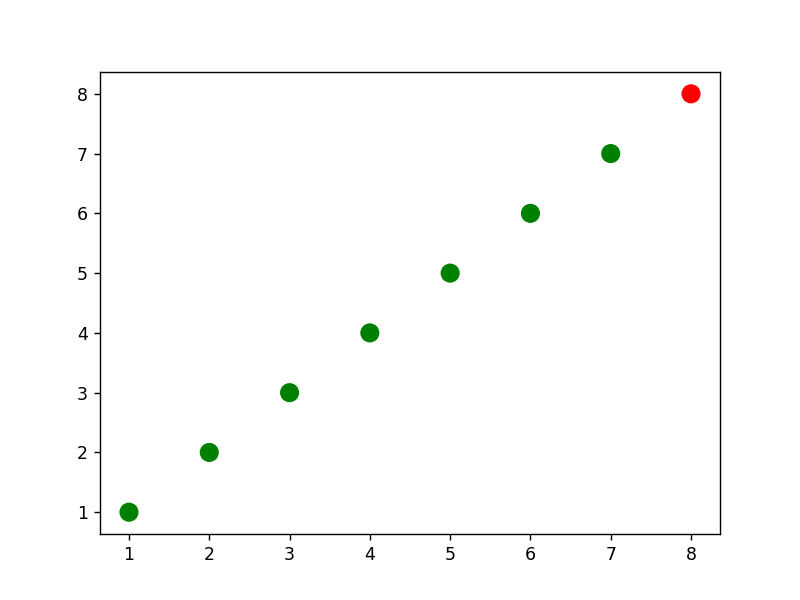

In [3]:
import numpy as np

x=np.array([1,2,3,4,5,6,7,8])
y=x
colors=["green"]*(len(x)-1)
colors.append("red")
plt.figure()
#plot the point with size100 and chosen colors
plt.scatter(x,y,s=100,c=colors)

In [20]:
# convert the two lists into a list of pairwise tuples
zip_generator = zip([1,2,3,4,5], [6,7,8,9,10])

print(list(zip_generator))


[(1, 6), (2, 7), (3, 8), (4, 9), (5, 10)]


In [21]:
zip_generator=zip([1,2,3,4,5],[6,7,8,9,10])
# The single star * unpacks a collection into positional arguments
print(*zip_generator)

(1, 6) (2, 7) (3, 8) (4, 9) (5, 10)


In [22]:
# use zip to convert 5 tuples with 2 elements each to 2 tuples with 5 elements each
print(list(zip((1, 6), (2, 7), (3, 8), (4, 9), (5, 10))))

[(1, 2, 3, 4, 5), (6, 7, 8, 9, 10)]


In [23]:
zip_generator = zip([1,2,3,4,5], [6,7,8,9,10])
# let's turn the data back into 2 lists
x, y = zip(*zip_generator) # This is like calling zip((1, 6), (2, 7), (3, 8), (4, 9), (5, 10))
print(x)
print(y)

(1, 2, 3, 4, 5)
(6, 7, 8, 9, 10)


<IPython.core.display.Javascript object>


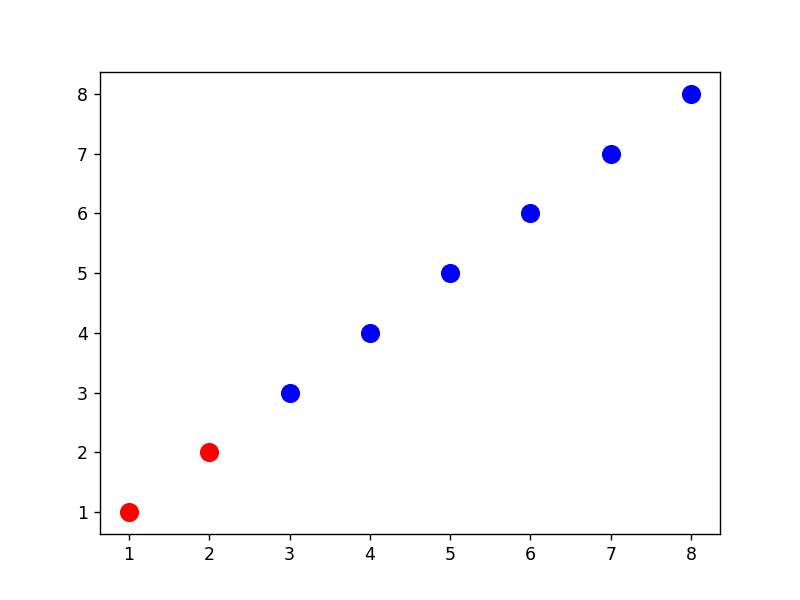

In [4]:
plt.figure()
# plot a data series 'Tall students' in red using the first two elements of x and y
plt.scatter(x[:2], y[:2], s=100, c='red', label='Tall students')
# plot a second data series 'Short students' in blue using the last three elements of x and y 
plt.scatter(x[2:], y[2:], s=100, c='blue', label='Short students')

## Properties of axis

In [ ]:
'best'            0
        'upper right'     1
        'upper left'      2
        'lower left'      3
        'lower right'     4
        'right'           5
        'center left'     6
        'center right'    7
        'lower center'    8
        'upper center'    9
        'center'          10

In [25]:
# add a label to the x axis
plt.xlabel("The number of times the child kicked a ball")
# add a label to the y axis
plt.ylabel('The grade of the student')
# add a title
plt.title('Relationship between ball kicking and grades')

Text(0.5,1,'Relationship between ball kicking and grades')

In [26]:
# add a legend (uses the labels from plt.scatter)
plt.legend()

In [9]:
# add the legend to loc=4 (the lower right hand corner), also gets rid of the frame and adds a title
plt.legend(loc=4, frameon=False, title='Legend')

In [28]:
# get children from current axes (the legend is the second to last item in this list)
plt.gca().get_children()

 Text(0.5,1,'Relationship between ball kicking and grades'),
 Text(0,1,''),
 Text(1,1,''),

In [29]:
# get the legend from the current axes
legend = plt.gca().get_children()[-2]

In [30]:
# you can use get_children to navigate through the child artists
legend.get_children()[0].get_children()[1].get_children()[0].get_children()

In [31]:
# import the artist class from matplotlib
from matplotlib.artist import Artist

def rec_gc(art, depth=0):
    if isinstance(art, Artist):
        # increase the depth for pretty printing
        print("  " * depth + str(art))
        for child in art.get_children():
            rec_gc(child, depth+2)

# Call this function on the legend artist to see what the legend is made up of
rec_gc(plt.legend())

Legend
            Text(0,0,'None')
                        Text(0,0,'Tall students')
                        Text(0,0,'Short students')
    FancyBboxPatch(0,0;1x1)


## Line plots

<IPython.core.display.Javascript object>


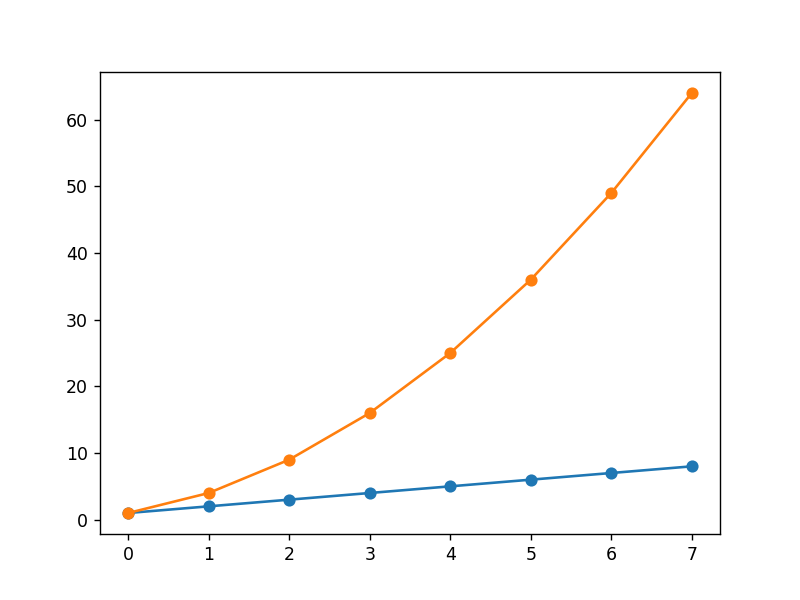

In [9]:
import numpy as np

linear_data = np.array([1,2,3,4,5,6,7,8])
exponential_data = linear_data**2

plt.figure()
# plot the linear data and the exponential data
plt.plot(linear_data, '-o', exponential_data, '-o')

In [6]:
#dashed red line
plt.plot([22,45,55],"--r")

In [34]:
plt.xlabel("some data")
plt.ylabel("some other")
plt.title("title")
plt.legend(["baseleine","comp","us"])

In [7]:
# fill the area between the linear data and exponential data
plt.gca().fill_between(range(len(linear_data)), 
                       linear_data, exponential_data, 
                       facecolor='blue', 
                       alpha=0.25)

### using dates

In [36]:
plt.figure()
observation_dates=np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')
plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o')

<IPython.core.display.Javascript object>

In [37]:
# doesntt ework, datetimes handling is hard


lets try pandas1

In [4]:
import pandas as pd

In [39]:
plt.figure()
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')
observation_dates = map(pd.to_datetime, observation_dates) # trying to plot a map will result in an error
plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o')

<IPython.core.display.Javascript object>

RuntimeError: matplotlib does not support generators as input

it doesnt work because map func returns an iterator and matplot cant handle it
so we need to convert it to list first (but its not efficient at handling memory data)


<IPython.core.display.Javascript object>


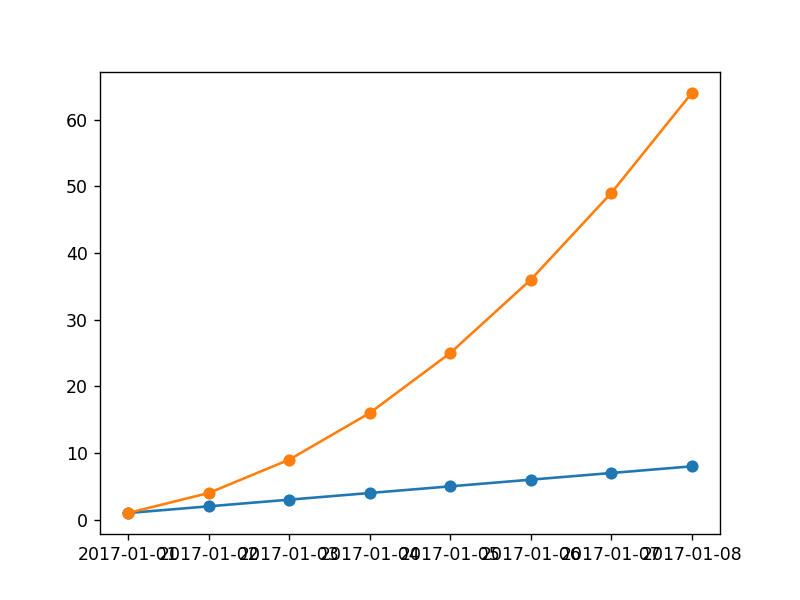

In [10]:
plt.figure()
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')
observation_dates = list(map(pd.to_datetime, observation_dates)) # convert the map to a list to get rid of the error
plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o')

In [41]:
x=plt.gca().xaxis
#rotate the tick label for the x axis
for item in x.get_ticklabels():
    item.set_rotation(45)

In [42]:
# import the artist class from matplotlib
from matplotlib.artist import Artist

def rec_gc(art, depth=0):
    if isinstance(art, Artist):
        # increase the depth for pretty printing
        print("  " * depth + str(art))
        for child in art.get_children():
            rec_gc(child, depth+2)

# Call this function on the legend artist to see what the legend is made up of
rec_gc(plt.legend())

In [43]:
# adjust the subplot so the text doesn't run off the image
plt.subplots_adjust(bottom=0.25)

In [44]:
ax = plt.gca()
ax.set_xlabel('Date')
ax.set_ylabel('Units')
ax.set_title('Exponential vs. Linear performance')

Text(0.5,1,'Exponential vs. Linear performance')

In [45]:
# you can add mathematical expressions in any text element
ax.set_title("Exponential ($x^2$) vs. Linear ($x$) performance")

Text(0.5,1,'Exponential ($x^2$) vs. Linear ($x$) performance')

In [46]:
plt.ticks_params

AttributeError: module 'matplotlib.pyplot' has no attribute 'ticks_params'

## Bar plots

In [6]:
plt.tick_params

<function matplotlib.pyplot.tick_params>

In [11]:
len(linear_data)

8

In [13]:
rang=range(len(linear_data
            ))

<IPython.core.display.Javascript object>


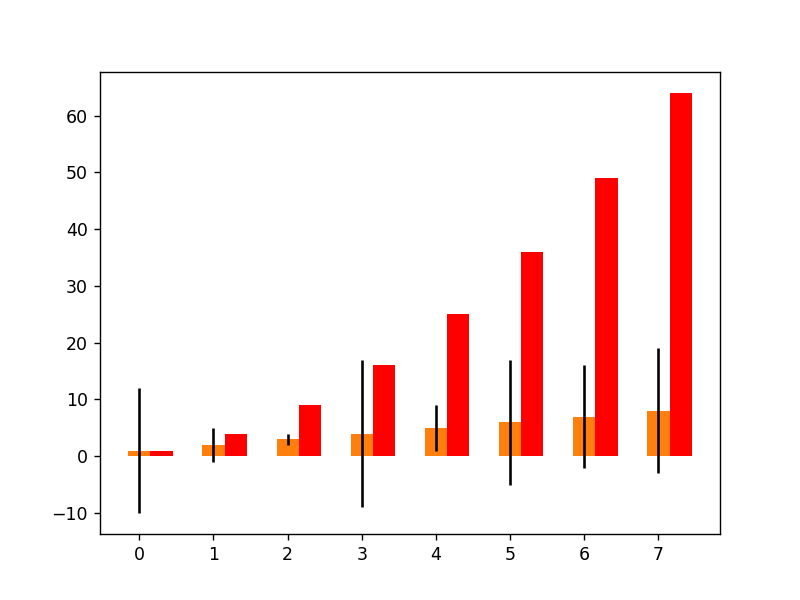

<Container object of 8 artists>

In [14]:
plt.figure()
xvals=range(len(linear_data))
plt.bar(xvals, linear_data, width=0.3)

In [15]:
new_xvals = []

# plot another set of bars, adjusting the new xvals to make up for the first set of bars plotted
for item in xvals:
    new_xvals.append(item+0.3)

plt.bar(new_xvals, exponential_data, width = 0.3 ,color='red')

<Container object of 8 artists>

### Error bars

In [16]:
from random import randint
linear_err = [randint(0,15) for x in range(len(linear_data))] 

# This will plot a new set of bars with errorbars using the list of random error values
plt.bar(xvals, linear_data, width = 0.3, yerr=linear_err)

<Container object of 8 artists>

### Stacked bar charts

<IPython.core.display.Javascript object>


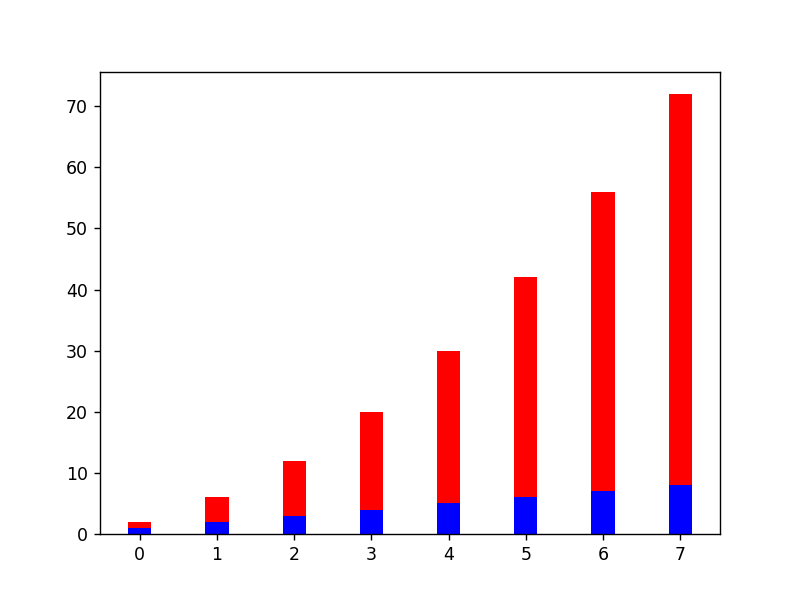

<Container object of 8 artists>

In [17]:
# stacked bar charts are also possible
plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width = 0.3, color='b')
plt.bar(xvals, exponential_data, width = 0.3, bottom=linear_data, color='r')

<IPython.core.display.Javascript object>


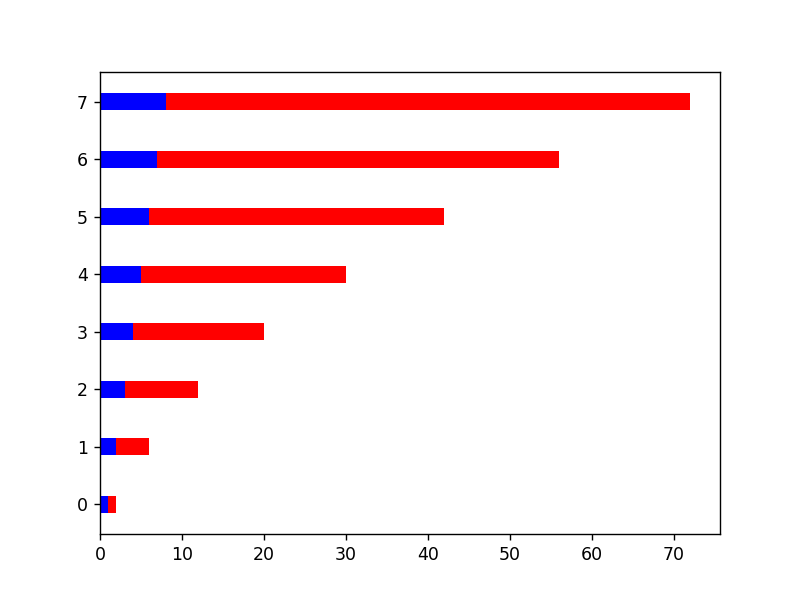

<Container object of 8 artists>

In [18]:
# or use barh for horizontal bar charts
plt.figure()
xvals = range(len(linear_data))
plt.barh(xvals, linear_data, height = 0.3, color='b')
plt.barh(xvals, exponential_data, height = 0.3, left=linear_data, color='r')

# Week 3 fundamentals

## Subplots

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt


<IPython.core.display.Javascript object>


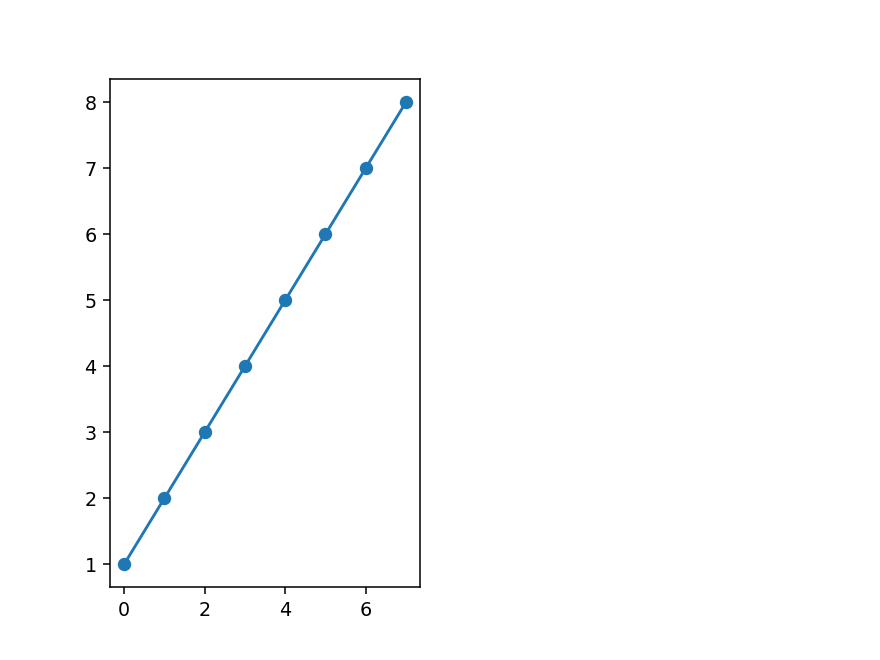

In [2]:
plt.figure()
# subplot with 1 row, 2 columns, and current axis is 1st subplot axes
plt.subplot(1, 2, 1)

linear_data = np.array([1,2,3,4,5,6,7,8])

plt.plot(linear_data, '-o')

In [57]:
exponential_data=linear_data**2

plt.subplot(1,2,2)
plt.plot(exponential_data,"-x")

In [3]:
# plot exponential data on 1st subplot axes
plt.subplot(1, 2, 1)
plt.plot(exponential_data, '-x')

C:\Users\Ederson\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


NameError: name 'exponential_data' is not defined

### Share axis

<IPython.core.display.Javascript object>


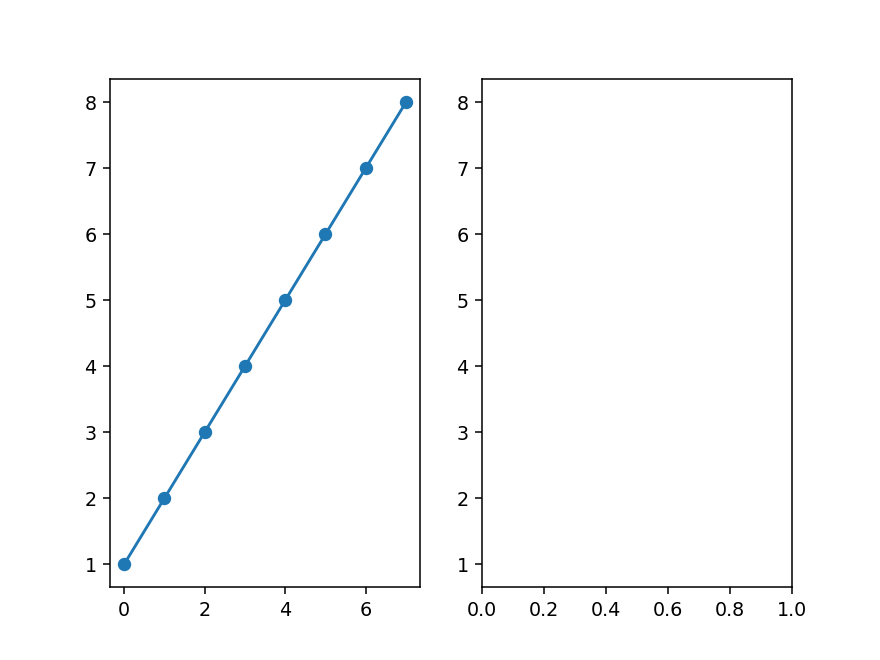

NameError: name 'exponential_data' is not defined

In [4]:
plt.figure()
ax1 = plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')
# pass sharey=ax1 to ensure the two subplots share the same y axis
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
plt.plot(exponential_data, '-x')

In [60]:
plt.figure()
plt.subplot(1,2,1) == plt.subplot(121)
# the right hand side is equivalent shorthand syntax

<IPython.core.display.Javascript object>

C:\Users\Ederson\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


True

### 3x3 grid subplot

<IPython.core.display.Javascript object>


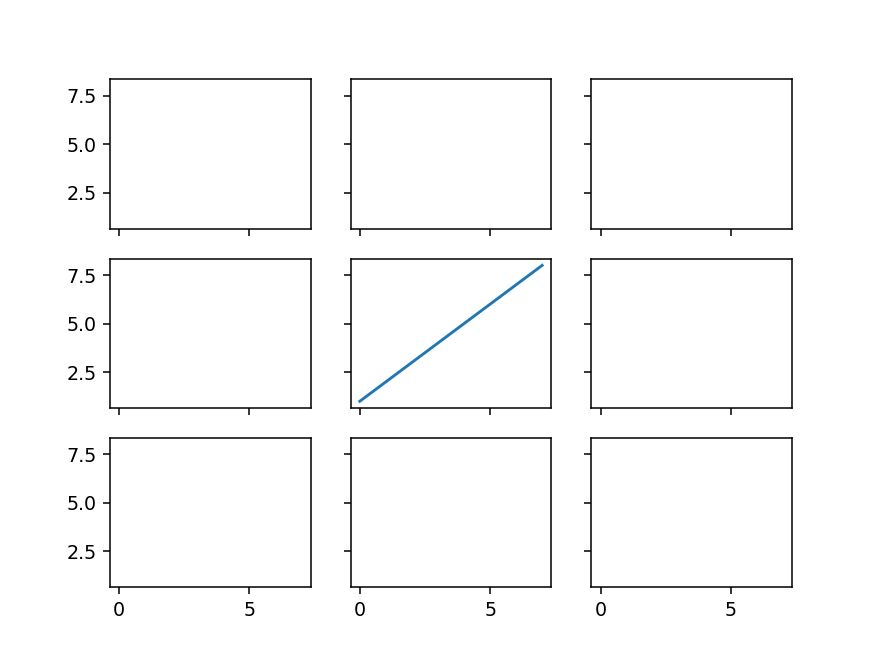

In [5]:
# create a 3x3 grid of subplots

fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9))=plt.subplots(3,3,
                                                             sharex=True,
                                                             sharey=True)
# plot the linear_data on the 5th subplot axes 
ax5.plot(linear_data, '-')

In [6]:
plt.gcf().canvas.draw()
#set inside tick labels to visible 
for ax in plt.gcf().get_axes():
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_visible(True)


## Histograms

In [63]:
#create 2x2 grid of axis subplots
fig,((ax1, ax2), (ax3, ax4))=plt.subplots(2,2,sharex=True)
axs=[ax1,ax2,ax3,ax4]

#draw n=10,100,1000,10000 samples from the normal distribution
for n in range(0,len(axs)):
    sample_size=10**(n+1)
    sample=np.random.normal(loc=0.0, scale=1.0,size=sample_size)
    axs[n].hist(sample)
    axs[n].set_title("n={}".format(sample_size))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


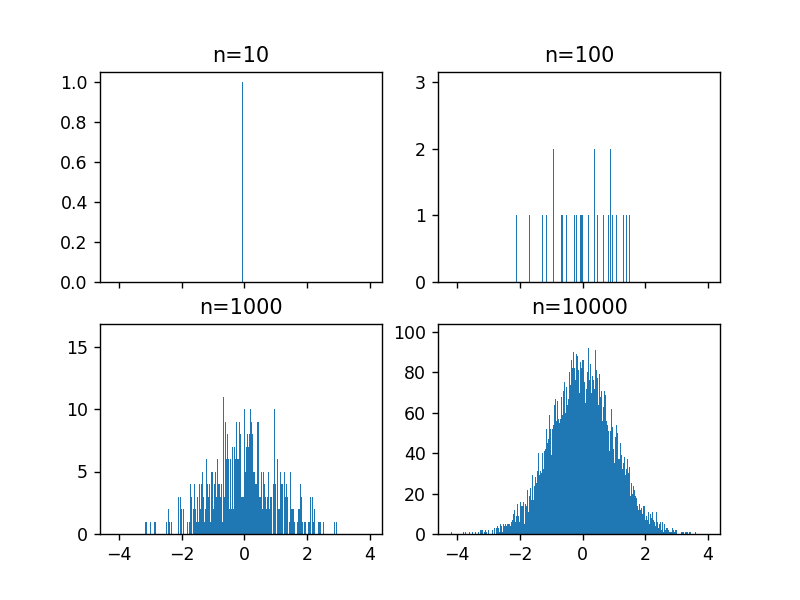

In [11]:
# repeat with number of bins set to 100
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

for n in range(0,len(axs)):
    sample_size=10**(n+1)
    sample=np.random.normal(loc=0.0, scale=1.0,size=sample_size)
    axs[n].hist(sample, bins=400)
    axs[n].set_title("n={}".format(sample_size))
    
#higher the bin number lower the granularity(it becomes finer)(bin too high then its useless)

<IPython.core.display.Javascript object>


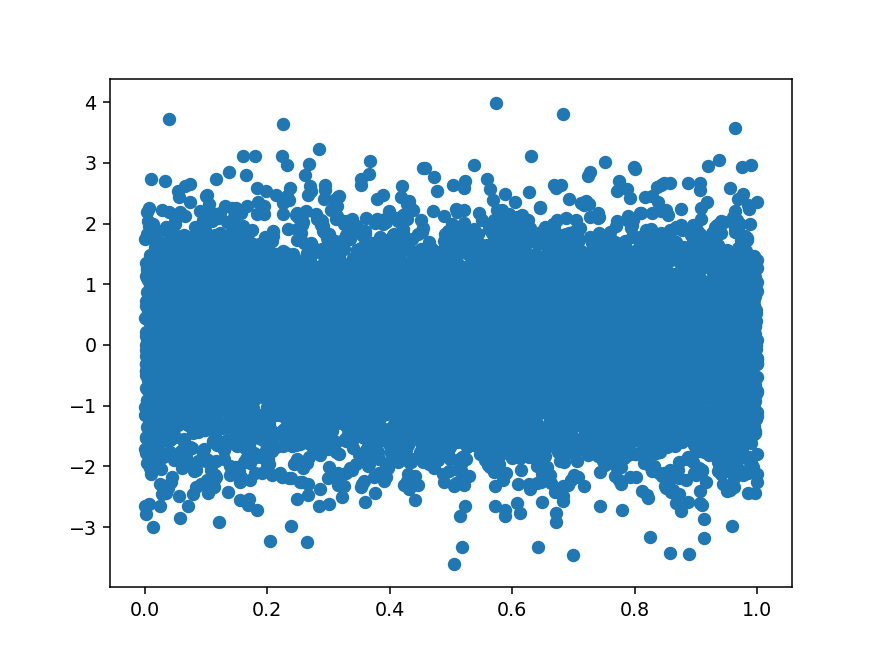

In [7]:
plt.figure()
Y=np.random.normal(loc=0.0, scale=1.0, size=10000)
X=np.random.random(size=10000)
plt.scatter(X,Y)

### Gridspec for partition plots

<IPython.core.display.Javascript object>


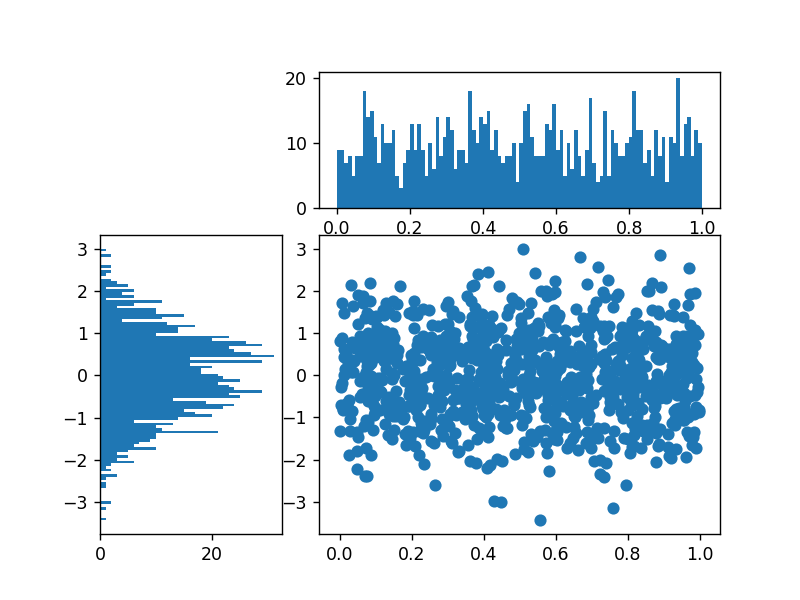

In [24]:
#use gridspec to partition the figure into subplots
import matplotlib.gridspec as gridspec

plt.figure()
gspec=gridspec.GridSpec(3,3)

top_histogram=plt.subplot(gspec[0,1:])
side_histogram=plt.subplot(gspec[1:,0])
lower_right=plt.subplot(gspec[1:,1:])

In [25]:
Y=np.random.normal(loc=0.0, scale=1.0, size=1000)
X=np.random.random(size=1000)
lower_right.scatter(X,Y)
top_histogram.hist(X,bins=100)
s=side_histogram.hist(Y,bins=100, orientation="horizontal")

In [68]:
#clear hist and plott normed one
top_histogram.clear()

In [69]:
top_histogram.hist(X,bins=100, normed=True)
side_histogram.clear()
side_histogram.hist(Y,bins=100, orientation="horizontal",normed=True)
#flip the side histo#s x values
side_histogram.invert_xaxis()

In [70]:
#axes values ar enot alluigned (cantd do it over matplot)

# change axes limits
for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 1)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-5, 5)

## Box and whiskers plots

In [2]:
import pandas as pd

normal_sample=np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample=np.random.random(size=10000)
gamma_sample=np.random.gamma(2,size=10000)

df=pd.DataFrame({"normal":normal_sample,
                "random":random_sample,
                "gamma":gamma_sample})
df

NameError: name 'np' is not defined

In [3]:
df.describe()


NameError: name 'df' is not defined

In [73]:
plt.figure()
#create boxplot for all 3 dfs coliumns
foo=plt.boxplot(df["normal"],whis="range")

<IPython.core.display.Javascript object>

In [74]:
plt.clf()

In [75]:
foo=plt.boxplot([df["normal"],df["random"],df["gamma"]], whis="range")

In [76]:
plt.figure()
foo=plt.hist(df["gamma"], bins=150)

<IPython.core.display.Javascript object>

In [77]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

In [78]:
plt.figure()
plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')
# overlay axis on top of another 
ax2 = mpl_il.inset_axes(plt.gca(), width='60%', height='40%', loc=2)
ax2.hist(df['gamma'], bins=100)
ax2.margins(x=0.5)

<IPython.core.display.Javascript object>

In [79]:
# switch the y axis ticks for ax2 to the right side
ax2.yaxis.tick_right()

In [80]:
# if `whis` argument isn't passed, boxplot defaults to showing 1.5*interquartile (IQR) whiskers with outliers
plt.figure()
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ] )

<IPython.core.display.Javascript object>

## Heatmap

In [81]:
plt.figure()

Y=np.random.normal(loc=0.0,scale=1.0, size=10000)
X=np.random.random(size=10000)
foo=plt.hist2d(X,Y, bins=100)

<IPython.core.display.Javascript object>

In [82]:
plt.figure()
foo=plt.hist2d(X,Y,bins=25)

<IPython.core.display.Javascript object>

In [83]:
#add colorbar legend
plt.colorbar()

## Animations

In [84]:
import matplotlib.animation as animation

n = 100
x = np.random.randn(n)

In [85]:
# create the function that will do the plotting, where curr is the current frame

def update(curr):
    ## check if animation is at the last frame, and if so, stop the animation a
    if curr==n:
        a.event_source.stop()
    plt.cla()
    bins=np.arange(-4,4,0.5)
    plt.hist(x[:curr],bins=bins)
    plt.axis([-4,4,0,30])
    plt.axis([-4,4,0,30])
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3,27])
    


In [86]:
fig=plt.figure()
a=animation.FuncAnimation(fig,update,interval=100)

<IPython.core.display.Javascript object>

## interactive

In [ ]:
plt.figure()
data=np.random.rand(10)
plt.plot(data)

def onclick(event):
    plt.cla()
    plt.plot(data)
    plt.gca().set_title("event at pixels {},{} \nand data {},{}".format(event.x,
                                                                        event.y,
                                                                        event.xdata,
                                                                        event.ydata))
    
# tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

In [ ]:
from random import shuffle
import pandas as pd 
origins=["china","brazil","usa","india","canada","uk",'Germany', 'Iraq', 'Chile', 'Mexico']

shuffle(origins)

df=pd.DataFrame({"height":np.random.rand(10),
                "weight":np.random.rand(10),
                "origin":origins})

df

In [ ]:
# picker=5 means the mouse doesn't have to click directly on an event, 
#but can be up to 5 pixels away

plt.figure()
plt.scatter(df["height"],df["weight"],picker=5)
plt.gca().set_ylabel("weight")
plt.gca().set_xlabel("height")

In [ ]:
def onpick(event):
    origin=df.iloc[df[0]]["origin"]
    plt.gca().set_title("selected item came from {}".format(origin))
    
plt.gcf().canvas.mpl_connect("pick_event",onpick)
# tell mpl_connect we want to pass a 'pick_event' into onpick when the event is detected


# Week 4 Applied Visualizations

## Plotting with pandas

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook


### Change underlying style

In [2]:
# see the pre-defined styles provided.
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 '_classic_test']

In [3]:
# use the 'seaborn-colorblind' style
plt.style.use('seaborn-colorblind')

### dataframe.plot

In [4]:
np.random.seed(123)

df = pd.DataFrame({'A': np.random.randn(365).cumsum(0), 
                   'B': np.random.randn(365).cumsum(0) + 20,
                   'C': np.random.randn(365).cumsum(0) - 20}, 
                  index=pd.date_range('1/1/2017', periods=365))
df.head()

,A,B,C
2017-01-01,-1.085631,20.059291,-20.230904
2017-01-02,-0.088285,21.803332,-16.659325
2017-01-03,0.194693,20.835588,-17.055481
2017-01-04,-1.311601,21.255156,-17.093802
2017-01-05,-1.890202,21.462083,-19.518638


<IPython.core.display.Javascript object>


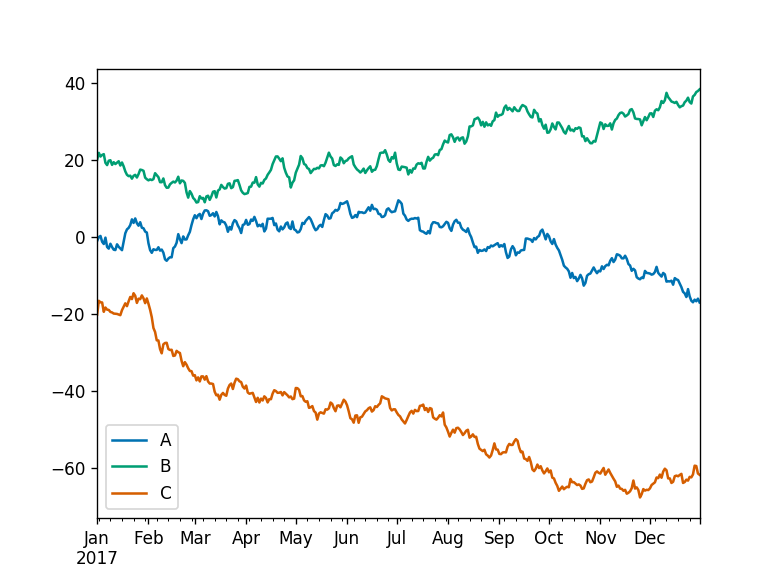

In [6]:
df.plot()

<IPython.core.display.Javascript object>


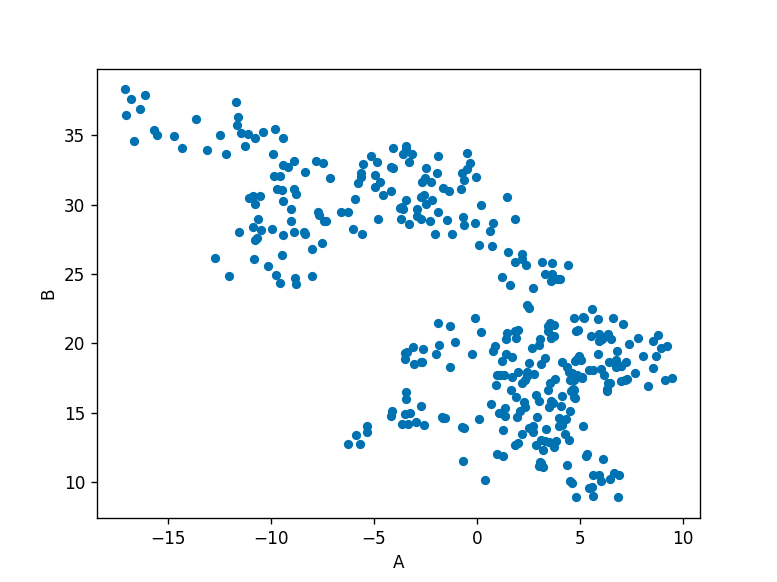

In [7]:
df.plot("A","B", kind="scatter")

<IPython.core.display.Javascript object>


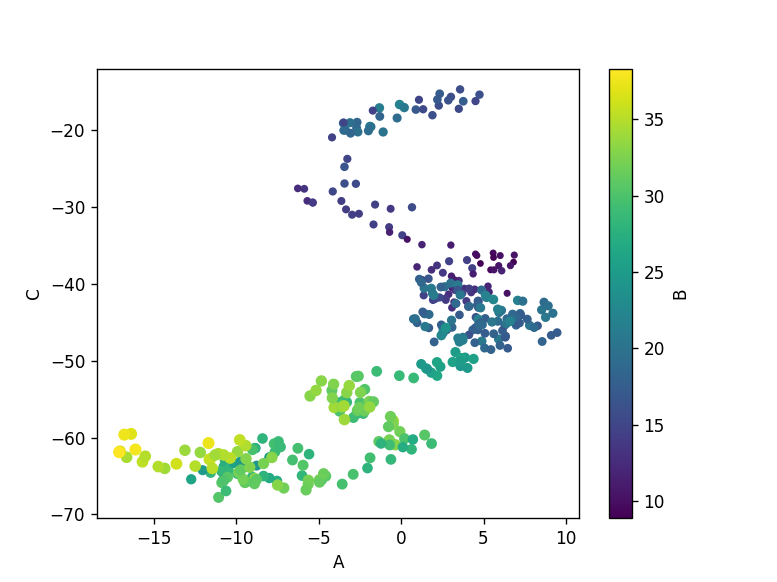

In [9]:
df.plot.scatter("A","C", c="B", s=df["B"], colormap="viridis")
# create a scatter plot of columns 'A' and 'C', with changing color (c) and size (s) based on column 'B'

<IPython.core.display.Javascript object>


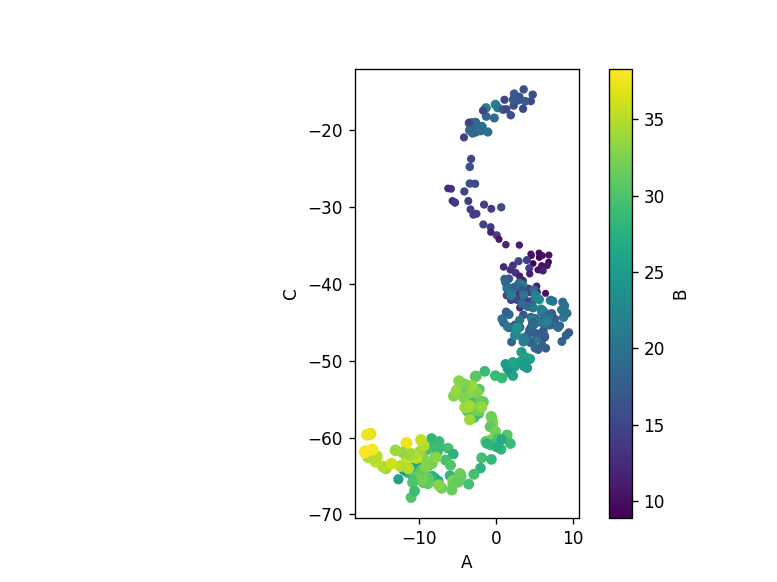

In [10]:
ax = df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis')
ax.set_aspect('equal')

<IPython.core.display.Javascript object>


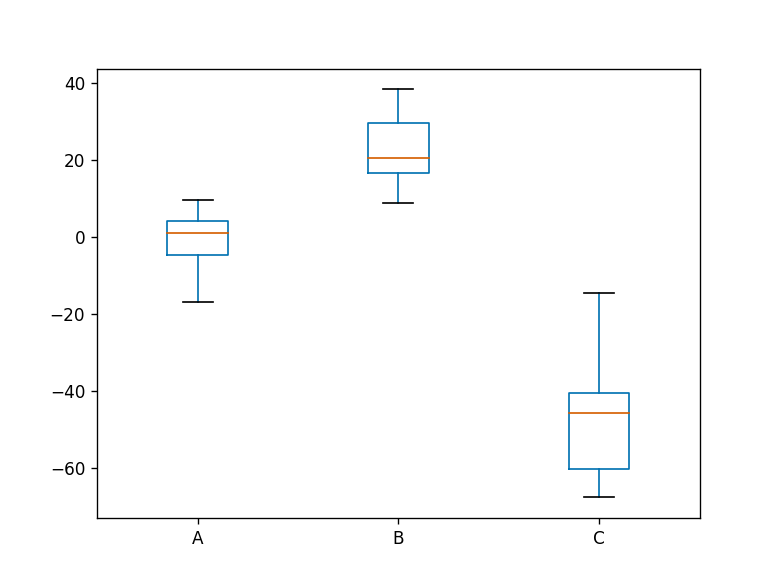

In [11]:
df.plot.box()

<IPython.core.display.Javascript object>


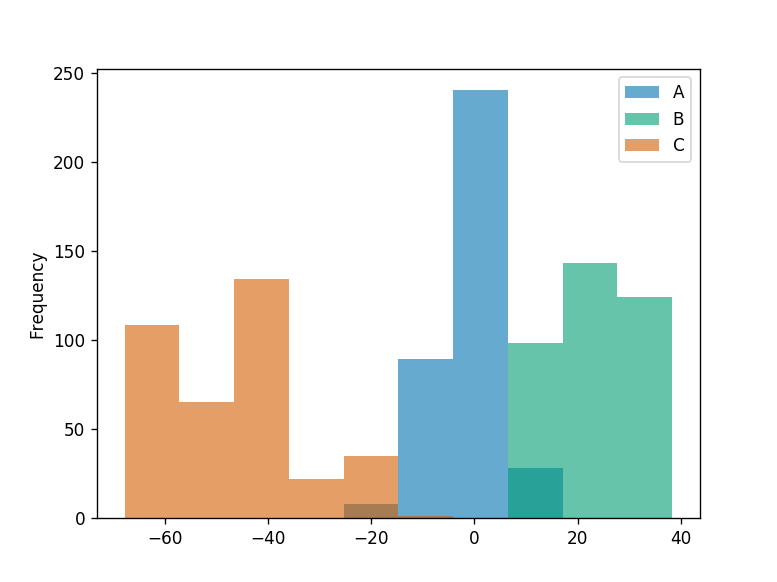

In [12]:
df.plot.hist(alpha=0.6)

<IPython.core.display.Javascript object>


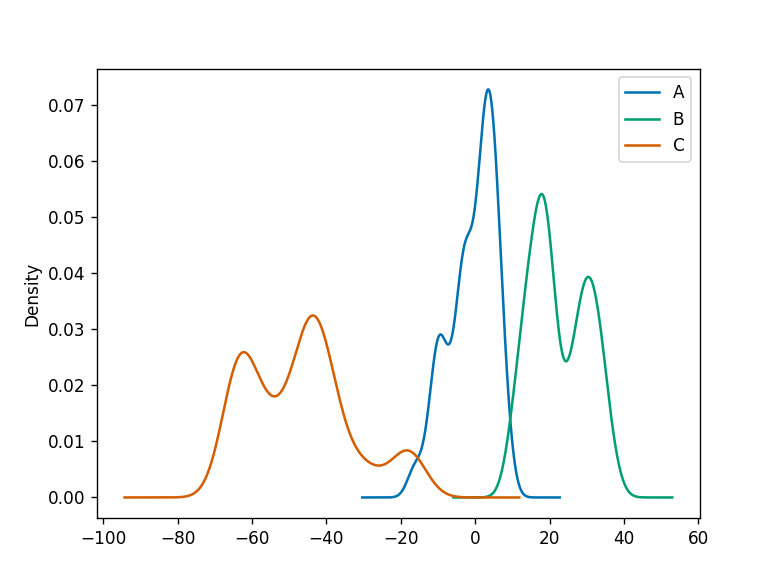

In [13]:
df.plot.kde()
#Kernel density estimation plots are useful for deriving a smooth continuous function from a given sample.

In [14]:
# pandas.tools.plotting

In [16]:
iris=pd.read_csv("iris.csv")
pd.tools.plotting.scatter_matrix(iris)
plt.figure()
pd.tools.plotting.paralles_coordinates(iris, "name");
#

FileNotFoundError: File b'iris.csv' does not exist

Parallel coordinate plots are a common way of visualizing high dimensional multivariate data. 
Each variable in the data set corresponds to an equally spaced parallel vertical line.
The values of each variable are then connected by lines between for 
each individual observation. 

Coloring the lines by class, in this example the species of flower, allows the viwer to 
see any paterns or clustering

## SEABORN

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
np.random.seed(1234)
v1=pd.Series(np.random.normal(0,10,1000), name="v1")
v2=pd.Series(v1*2 + np.random.normal(60,15,1000), name="v2")

<IPython.core.display.Javascript object>


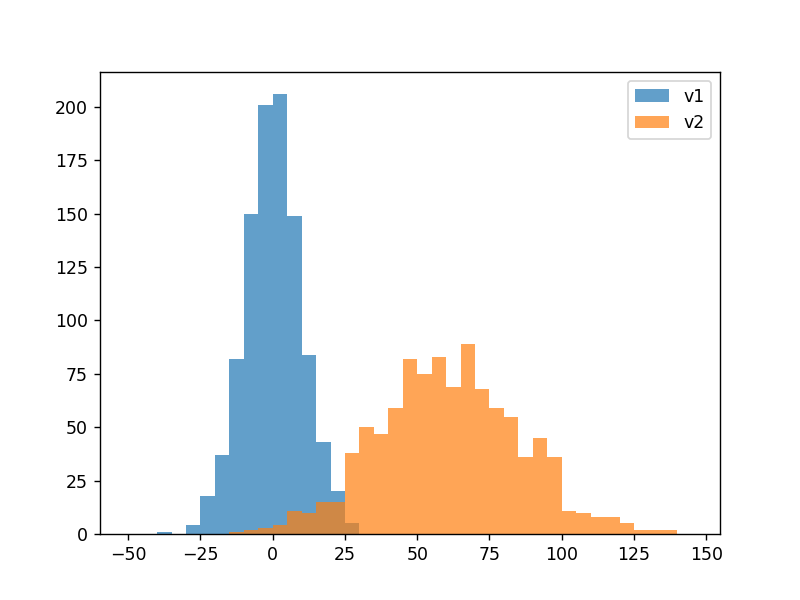

In [22]:
%matplotlib notebook

plt.figure()
plt.hist(v1, alpha=0.7, bins=np.arange(-50,150,5), label="v1")
plt.hist(v2, alpha=0.7, bins=np.arange(-50,150,5), label="v2")
plt.legend()

<IPython.core.display.Javascript object>


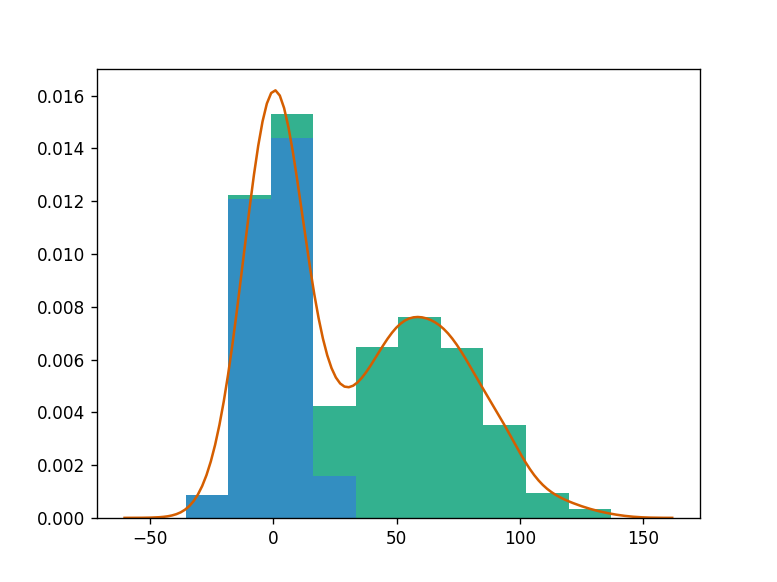

In [20]:
plt.figure()
plt.hist([v1,v2],alpha=0.8, histtype="barstacked", normed=True) #normed True will form a probabilty density
v3=np.concatenate((v1,v2))
sns.kdeplot(v3) #kernel density over the hist plot

<IPython.core.display.Javascript object>


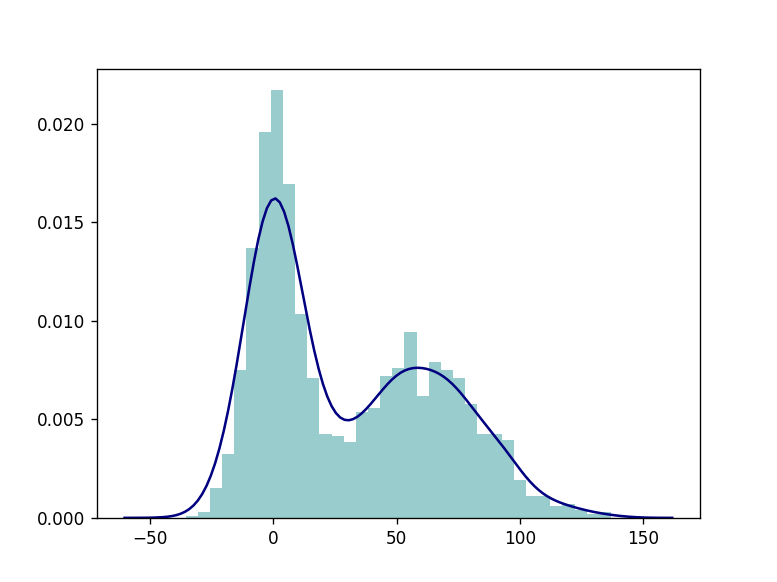

In [21]:
plt.figure()
# we can pass keyword arguments for each individual component of the plot
sns.distplot(v3, bins=35, hist_kws={'color': 'Teal'}, kde_kws={'color': 'Navy'});

jointplot

<IPython.core.display.Javascript object>


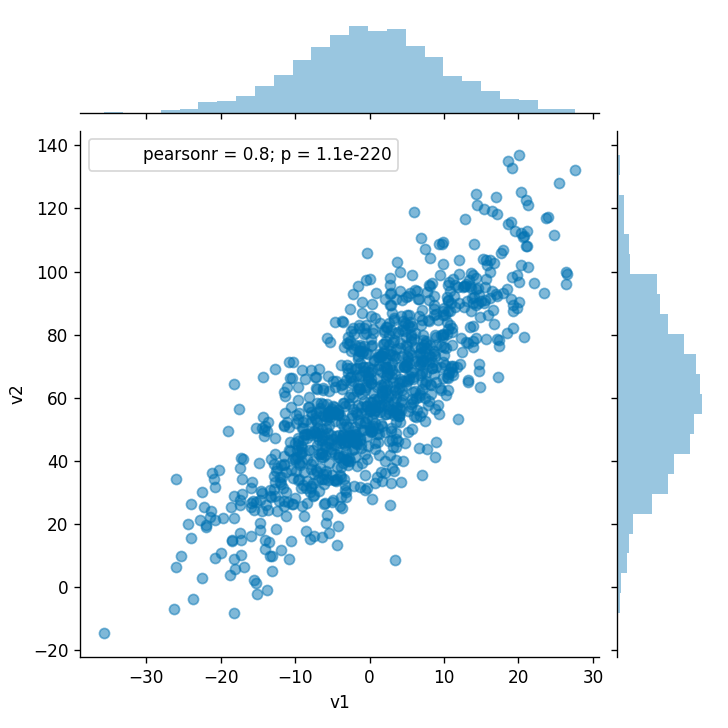

In [23]:
sns.jointplot(v1,v2,alpha=0.5)

<IPython.core.display.Javascript object>


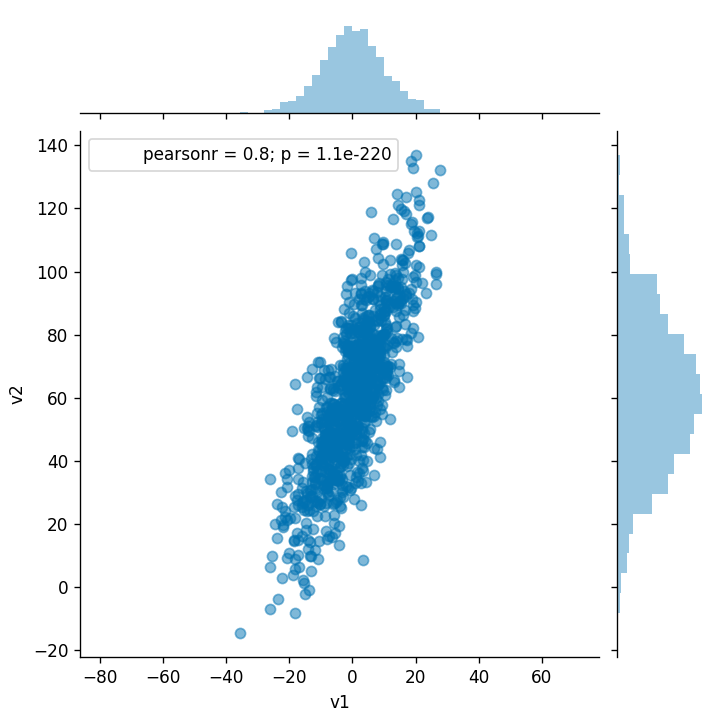

In [24]:
grid=sns.jointplot(v1,v2, alpha=0.5)
grid.ax_joint.set_aspect("equal")

#In both cases, matplotlib can be used to further tweak the plots. 
#For example, sns.jointplot returns a Seaborn grid object. 
#from this we can plot a map plot axis subplot object using grid.x joint. 
#Then, we can set the aspect ratio to be equal, using set_aspect equal. 
#Hexbin plots are the bivariate counterpart to histograms. 
#Hexbin plots show the number of observations that fall within hexagonal bins. 

#AXIS HAVE THE SAME SIZE!!

<IPython.core.display.Javascript object>


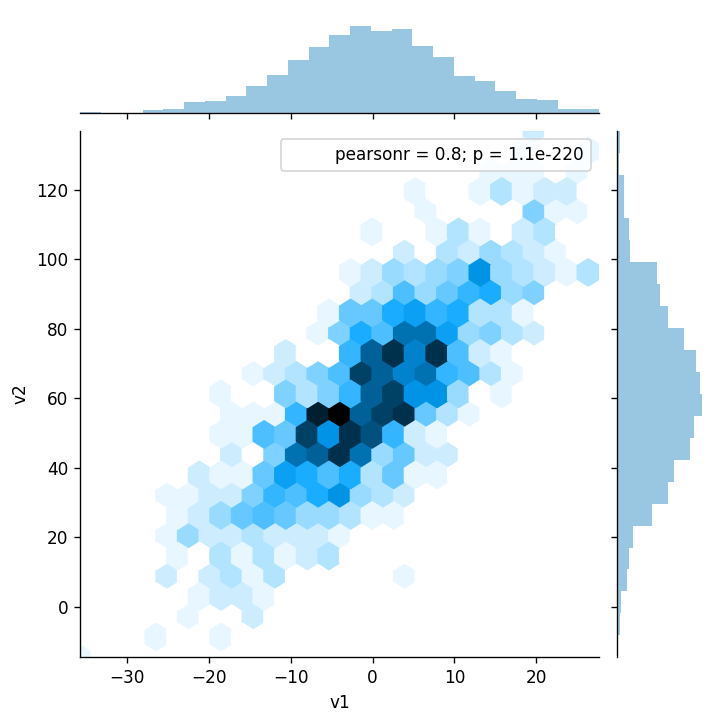

In [25]:
#hexbin style

sns.jointplot(v1,v2, kind="hex") #works well with large data files

<IPython.core.display.Javascript object>


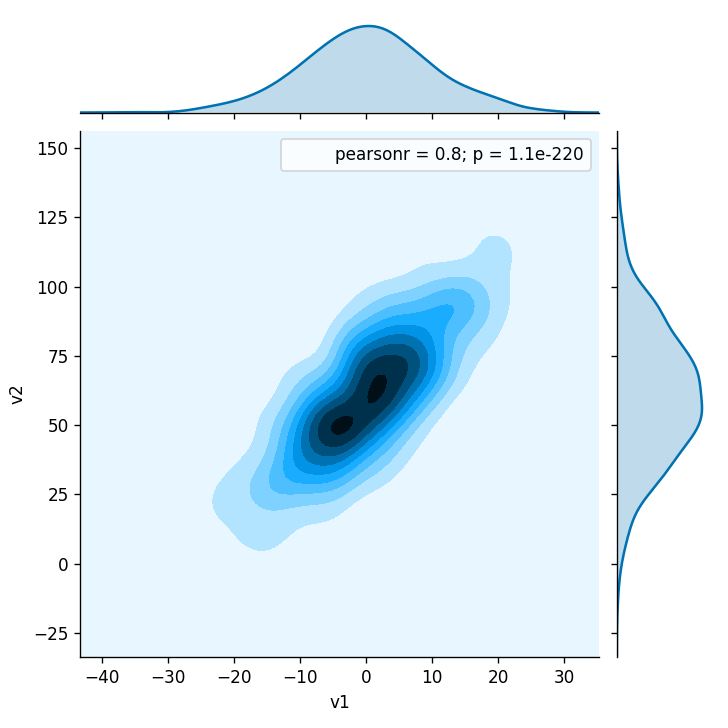

In [26]:
sns.jointplot(v1,v2, kind="kde")

In [27]:
sns.set_style("white")#grey grid turned off

<IPython.core.display.Javascript object>


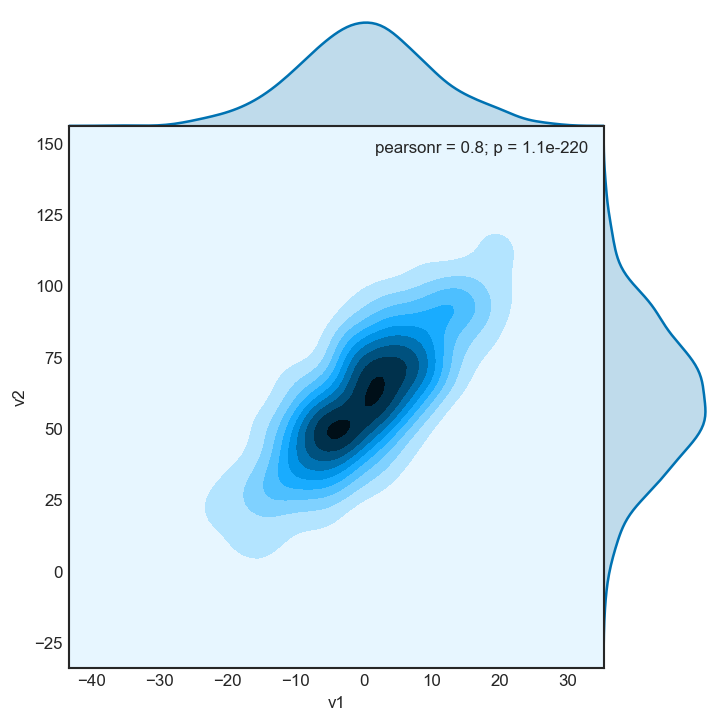

In [28]:
sns.jointplot(v1, v2, kind='kde', space=0);

In [29]:
iris = pd.read_csv('iris.csv')
iris.head()
sns.pairplot(iris, hue='Name', diag_kind='kde', size=2);
plt.figure(figsize=(8,6))
plt.subplot(121)
sns.swarmplot('Name', 'PetalLength', data=iris);
plt.subplot(122)
sns.violinplot('Name', 'PetalLength', data=iris);